In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
# Carregar o DataFrame original
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

# Converter a data para datetime
df['Screening_date'] = pd.to_datetime(df['Screening_date'])

# Criar um DataFrame com o total de rastreios por data
total_screenings_df = df.groupby('Screening_date').size().reset_index(name='Total_screenings')

total_screenings_df

,Screening_date,Total_screenings
0,2022-03-03,92
1,2022-03-19,62
2,2022-03-26,90
3,2022-04-04,69
4,2022-04-09,70
...,...,...
85,2024-03-23,168
86,2024-03-30,198
87,2024-04-06,242
88,2024-04-20,186


In [3]:
# Criar um intervalo de datas completo
min_date = df['Screening_date'].min()
max_date = df['Screening_date'].max()
date_range = pd.date_range(start=min_date, end=max_date)

# Criar um DataFrame com todas as datas do intervalo
all_dates_df = pd.DataFrame(date_range, columns=['Screening_date'])

# Fazer o merge de total_screenings_df com all_dates_df
complete_screenings_df = all_dates_df.merge(total_screenings_df, on='Screening_date', how='left')

# Substituir os valores ausentes por 0
complete_screenings_df['Total_screenings'] = complete_screenings_df['Total_screenings'].fillna(0).astype(int)

print(complete_screenings_df)

    Screening_date  Total_screenings
0       2022-03-03                92
1       2022-03-04                 0
2       2022-03-05                 0
3       2022-03-06                 0
4       2022-03-07                 0
..             ...               ...
782     2024-04-23                 0
783     2024-04-24                 0
784     2024-04-25                 0
785     2024-04-26                 0
786     2024-04-27               184

[787 rows x 2 columns]


In [4]:
df = complete_screenings_df

df

,Screening_date,Total_screenings
0,2022-03-03,92
1,2022-03-04,0
2,2022-03-05,0
3,2022-03-06,0
4,2022-03-07,0
...,...,...
782,2024-04-23,0
783,2024-04-24,0
784,2024-04-25,0
785,2024-04-26,0


ADD DATE RELATED VARIABLES

In [5]:
df

,Screening_date,Total_screenings
0,2022-03-03,92
1,2022-03-04,0
2,2022-03-05,0
3,2022-03-06,0
4,2022-03-07,0
...,...,...
782,2024-04-23,0
783,2024-04-24,0
784,2024-04-25,0
785,2024-04-26,0


In [6]:
# Assuming your DataFrame has a column named 'date' that contains date information
df['Screening_date'] = pd.to_datetime(df['Screening_date'])  # Convert the date column to datetime
df.set_index('Screening_date', inplace=True)  # Set the date column as the index

In [7]:
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)
df['day_of_year'] = df.index.dayofyear
df['time_trend'] = range(len(df))
df['season'] = (df['month'] % 12 + 3) // 3

ADD LAGS E ROLLING STATISTICS

In [8]:
df['lag_1'] = df['Total_screenings'].shift(1)
df['lag_7'] = df['Total_screenings'].shift(7)

df['rolling_mean_7'] = df['Total_screenings'].rolling(window=7).mean()
df['rolling_std_7'] = df['Total_screenings'].rolling(window=7).std()

In [9]:
df

,Total_screenings,day_of_week,month,is_weekend,day_of_year,time_trend,season,lag_1,lag_7,rolling_mean_7,rolling_std_7
Screening_date,,,,,,,,,,,
2022-03-03,92,3,3,0,62,0,2,NaN,NaN,NaN,NaN
2022-03-04,0,4,3,0,63,1,2,92.0,NaN,NaN,NaN
2022-03-05,0,5,3,1,64,2,2,0.0,NaN,NaN,NaN
2022-03-06,0,6,3,1,65,3,2,0.0,NaN,NaN,NaN
2022-03-07,0,0,3,0,66,4,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,0,1,4,0,114,782,2,0.0,0.0,26.571429,70.301392
2024-04-24,0,2,4,0,115,783,2,0.0,0.0,26.571429,70.301392
2024-04-25,0,3,4,0,116,784,2,0.0,0.0,26.571429,70.301392


In [10]:
# Remover linhas com quaisquer valores NaN
df.dropna(inplace=True)

In [11]:
df.columns

Index(['Total_screenings', 'day_of_week', 'month', 'is_weekend', 'day_of_year',
       'time_trend', 'season', 'lag_1', 'lag_7', 'rolling_mean_7',
       'rolling_std_7'],
      dtype='object')

CORRELAÇÃO ENTRE VVS

                  Total_screenings  day_of_week     month  is_weekend  \
Total_screenings          1.000000     0.214882 -0.045081    0.340705   
day_of_week               0.214882     1.000000  0.010325    0.789886   
month                    -0.045081     0.010325  1.000000    0.007193   
is_weekend                0.340705     0.789886  0.007193    1.000000   
day_of_year              -0.046787     0.009548  0.996482    0.006701   
time_trend                0.086896    -0.001102 -0.051593   -0.000687   
season                   -0.007638    -0.002016  0.581990   -0.002415   
lag_1                    -0.051293     0.322576 -0.040949    0.322791   
lag_7                     0.442359     0.210845 -0.029996    0.332315   
rolling_mean_7            0.342371     0.001082 -0.108357    0.003890   
rolling_std_7             0.325967    -0.000427 -0.140657    0.006342   

                  day_of_year  time_trend    season     lag_1     lag_7  \
Total_screenings    -0.046787    0.086896 -0.007

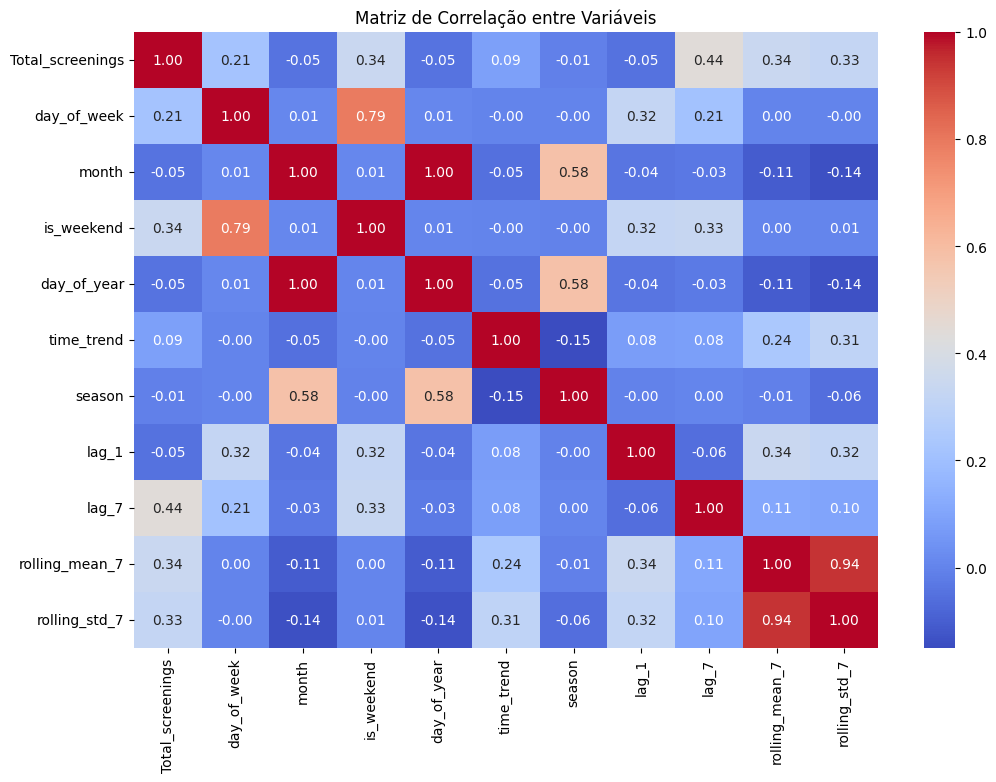

In [12]:
import seaborn as sns

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

In [13]:
# Remover a coluna 'day_of_week' do DataFrame
df.drop(columns=['day_of_year'], inplace=True)

# Verificar se a coluna foi removida
print(df.columns)

Index(['Total_screenings', 'day_of_week', 'month', 'is_weekend', 'time_trend',
       'season', 'lag_1', 'lag_7', 'rolling_mean_7', 'rolling_std_7'],
      dtype='object')


In [14]:
# Remover a coluna 'rolling_mean_7' do DataFrame
df.drop(columns=['rolling_mean_7'], inplace=True)

# Verificar se a coluna foi removida
print(df.columns)

Index(['Total_screenings', 'day_of_week', 'month', 'is_weekend', 'time_trend',
       'season', 'lag_1', 'lag_7', 'rolling_std_7'],
      dtype='object')


In [15]:
df.head(1000)

,Total_screenings,day_of_week,month,is_weekend,time_trend,season,lag_1,lag_7,rolling_std_7
Screening_date,,,,,,,,,
2022-03-10,0,3,3,0,7,2,0.0,92.0,0.000000
2022-03-11,0,4,3,0,8,2,0.0,0.0,0.000000
2022-03-12,0,5,3,1,9,2,0.0,0.0,0.000000
2022-03-13,0,6,3,1,10,2,0.0,0.0,0.000000
2022-03-14,0,0,3,0,11,2,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
2024-04-23,0,1,4,0,782,2,0.0,0.0,70.301392
2024-04-24,0,2,4,0,783,2,0.0,0.0,70.301392
2024-04-25,0,3,4,0,784,2,0.0,0.0,70.301392


# COM NORMALIZAÇÃO

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supondo que você já tenha um DataFrame chamado 'df'

# Instanciando o MinMaxScaler
scaler = MinMaxScaler()

# Selecionando as colunas que deseja normalizar
columns_to_normalize = ['time_trend', 'lag_1', 'lag_7', 'rolling_std_7']

# Aplicando a normalização
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Exibindo as primeiras linhas do DataFrame para verificar o resultado
print(df.head())

# Assuming your DataFrame is named 'df'
X = df[['month', 'is_weekend', 'day_of_week', 'time_trend', 'season', 'lag_1', 'lag_7', 'rolling_std_7']]
y = df['Total_screenings']

                Total_screenings  day_of_week  month  is_weekend  time_trend  \
Screening_date                                                                 
2022-03-10                     0            3      3           0    0.000000   
2022-03-11                     0            4      3           0    0.001284   
2022-03-12                     0            5      3           1    0.002567   
2022-03-13                     0            6      3           1    0.003851   
2022-03-14                     0            0      3           0    0.005135   

                season  lag_1    lag_7  rolling_std_7  
Screening_date                                         
2022-03-10           2    0.0  0.22549            0.0  
2022-03-11           2    0.0  0.00000            0.0  
2022-03-12           2    0.0  0.00000            0.0  
2022-03-13           2    0.0  0.00000            0.0  
2022-03-14           2    0.0  0.00000            0.0  


# MULTIPLE LINEAR REGRESSION MODEL

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named 'df'
X = df[['month', 'is_weekend', 'day_of_week', 'time_trend', 'season', 'lag_1', 'lag_7', 'rolling_std_7']]
y = df['Total_screenings']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [20]:
# Dividir o conjunto de dados em treino e teste baseado na data
y_train = y[:'2024-02-29']  # Dados até 29-02-2024, exclusivo
y_test = y['2024-03-01':]   # Dados a partir de 01-03-2024

# Dividir as variáveis exógenas de acordo com as mesmas datas
X_train = X.loc[:'2024-02-29']
X_test = X.loc['2024-03-01':]

In [21]:
# Contar o número de elementos em y_train e y_test
num_y_train = len(y_train)
num_y_test = len(y_test)

print(f"Número de elementos em y_train: {num_y_train}")
print(f"Número de elementos em y_test: {num_y_test}")


Número de elementos em y_train: 722
Número de elementos em y_test: 58


In [50]:
# Adicionar uma constante aos dados
X_train_sm = sm.add_constant(X_train)
X_test_sm = X_test.copy()  # Certifique-se de que não está sobrescrevendo X_test original
X_test_sm.insert(0, 'const', 1.0)

# print(X_train_sm.head())
# print(X_test_sm.head())

# Ajustar o modelo
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Obter o resumo do modelo
print(model_sm.summary())

# Fazer previsões no conjunto de teste
y_pred = model_sm.predict(X_test_sm)

                            OLS Regression Results                            
Dep. Variable:       Total_screenings   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     48.15
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           4.42e-62
Time:                        21:24:57   Log-Likelihood:                -3355.8
No. Observations:                 722   AIC:                             6730.
Df Residuals:                     713   BIC:                             6771.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.3305      3.524     -1.796

In [51]:
# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

print("Modelo: LR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: LR shuffle
# MAE: 33.35982158759114
# MSE: 2641.225069880452
# RMSE: 51.39285037707533
# R2: 0.31079717070950164
# ME: -7.803461348530812
# MAV: 18.692307692307693
# MPV: inf
# RME: nan
# RMAE: inf

# Modelo: LR split date
# MAE: 40.44072649029869
# MSE: 3854.415726993212
# RMSE: 62.083940975047746
# R2: 0.3735334173885675
# ME: -6.164179486197499
# MAV: 27.310344827586206
# MPV: inf
# RME: nan
# RMAE: inf

Modelo: LR
MAE: 40.44072649029883
MSE: 3854.4157269932175
RMSE: 62.08394097504779
R2: 0.3735334173885666
ME: -6.164179486197655
MAV: 27.310344827586206
MPV: inf
RME: nan
RMAE: inf


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


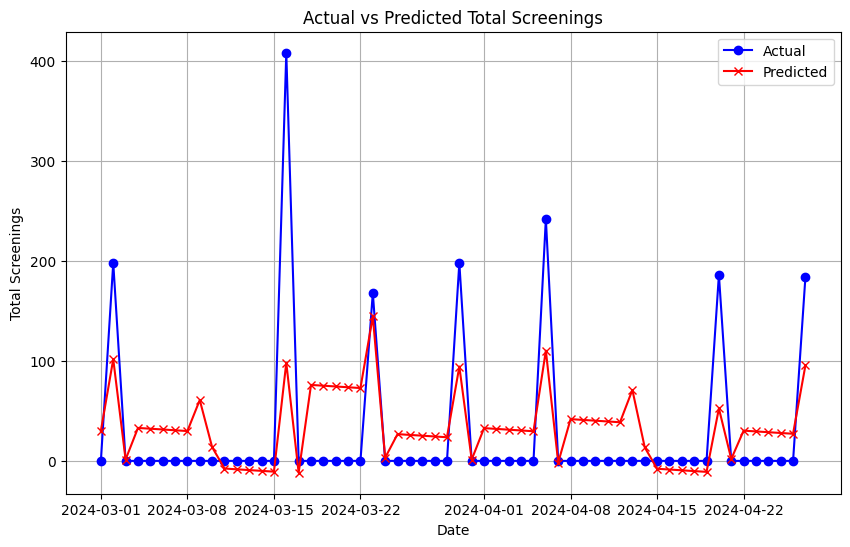

In [52]:
# Visualizar os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Total Screenings')
plt.title('Actual vs Predicted Total Screenings')
plt.legend()
plt.grid(True)
plt.show()


# GLM MODEL

In [53]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian
from sklearn.preprocessing import PolynomialFeatures

Gaussian

In [54]:
# Ajustar o modelo GLM com família Gaussian
model_glm = GLM(y_train, X_train_sm, family=Gaussian()).fit()

# Obter o resumo do modelo
print(model_glm.summary())

# Fazer previsões no conjunto de teste
y_pred = model_glm.predict(X_test_sm)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Total_screenings   No. Observations:                  722
Model:                            GLM   Df Residuals:                      713
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                          645.86
Method:                          IRLS   Log-Likelihood:                -3355.8
Date:                Mon, 02 Sep 2024   Deviance:                   4.6050e+05
Time:                        21:25:03   Pearson chi2:                 4.60e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4135
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.3305      3.524     -1.796

c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [55]:
print("Modelo: GLM com Gaussian")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: GLM com Gaussian split = 
# Modelo: GLM com Gaussian
# MAE: 40.44072649029869
# MSE: 3854.415726993212
# RMSE: 62.083940975047746
# R2: 0.3735334173885675
# ME: -6.164179486197499
# MAV: 27.310344827586206
# MPV: inf
# RME: nan
# RMAE: inf

# shuffle
# MAE: 33.35982158759114
# MSE: 2641.225069880452
# RMSE: 51.39285037707533
# R2: 0.31079717070950164
# ME: -7.803461348530812
# MAV: 18.692307692307693
# MPV: inf
# RME: nan
# RMAE: inf

Modelo: GLM com Gaussian
MAE: 40.44072649029883
MSE: 3854.4157269932175
RMSE: 62.08394097504779
R2: 0.3735334173885666
ME: -6.164179486197655
MAV: 27.310344827586206
MPV: inf
RME: nan
RMAE: inf


Kernel

In [56]:
# Definir o grau do polinômio
degree = 2

# Criar o transformador polinomial
poly = PolynomialFeatures(degree)

# Ajustar e transformar os dados de treino
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ajustar o modelo GLM com família Gaussian, sem adicionar a constante manualmente
model_glm = GLM(y_train, X_train_poly, family=Gaussian()).fit()

# Obter o resumo do modelo
print(model_glm.summary())

# Fazer previsões no conjunto de teste
y_pred_glm = model_glm.predict(X_test_poly)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred_glm)
mse = mean_squared_error(y_test, y_pred_glm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_glm)
me = np.mean(y_test - y_pred_glm)
mav = np.mean(np.abs(y_pred_glm))
mpv = np.mean(np.abs((y_test - y_pred_glm) / y_test))
rme = np.mean((y_test - y_pred_glm) / y_test)
rmae = np.mean(np.abs(y_test - y_pred_glm) / np.abs(y_test))

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Total_screenings   No. Observations:                  722
Model:                            GLM   Df Residuals:                      678
Model Family:                Gaussian   Df Model:                           43
Link Function:               Identity   Scale:                          281.36
Method:                          IRLS   Log-Likelihood:                -3037.7
Date:                Mon, 02 Sep 2024   Deviance:                   1.9076e+05
Time:                        21:25:08   Pearson chi2:                 1.91e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9223
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9182      8.479      0.344      0.7

c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [57]:
print("Modelo: GLM com kernel polinomial")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: GLM com kernel polinomial split
# MAE: 10.25683122936367
# MSE: 674.9257704263061
# RMSE: 25.979333525444915
# R2: 0.8903028446168176
# ME: 5.568437436002884
# MAV: 27.310344827586206
# MPV: inf
# RME: nan
# RMAE: inf

# Modelo: GLM com kernel polinomial shuffle
# MAE: 44.2479121440151
# MSE: 3728.8418599539764
# RMSE: 61.064243710652605
# R2: 0.026993803306037067
# ME: -12.766599990568572
# MAV: 18.692307692307693
# MPV: inf
# RME: nan
# RMAE: inf


Modelo: GLM com kernel polinomial
MAE: 10.25683122909188
MSE: 674.925770430672
RMSE: 25.97933352552894
R2: 0.890302844616108
ME: 5.56843743677006
MAV: 26.139121642213812
MPV: inf
RME: nan
RMAE: inf


In [58]:
# Mapear coeficientes para nomes de características
feature_names = poly.get_feature_names_out(X_train.columns)

# Criar lista completa de características
all_features = list(feature_names)  # Não adicionamos 'Intercept', pois statsmodels já o inclui

# Criar DataFrame com características e coeficientes
coef_df = pd.DataFrame({
    'features': all_features,
    'coefficients': model_glm.params
})

# Calcular a soma dos valores absolutos dos coeficientes
sum_abs_coefficients = coef_df['coefficients'].abs().sum()

# Calcular a importância relativa como fração dos coeficientes absolutos, de modo que a soma seja 100
coef_df['relative_importance'] = (coef_df['coefficients'].abs() / sum_abs_coefficients) * 100

# Ordenar por importância relativa
coef_df = coef_df.sort_values(by='relative_importance', ascending=False).reset_index(drop=True)

# Exibir o DataFrame resultante
print(coef_df)

# # Exportar o DataFrame para um arquivo Excel
# coef_df.to_excel("coef_importance.xlsx", index=False)

# print("O DataFrame foi exportado para 'coef_importance.xlsx'")


                     features  coefficients  relative_importance
0                     lag_1^2   -395.401186            14.309598
1         lag_1 rolling_std_7    366.951505            13.280002
2                     lag_7^2   -336.368304            12.173194
3            is_weekend lag_7   -301.903377            10.925906
4         lag_7 rolling_std_7    289.207509            10.466441
5    is_weekend rolling_std_7    287.129177            10.391226
6            is_weekend lag_1   -212.209114             7.679864
7            time_trend lag_7    123.426180             4.466803
8                 lag_1 lag_7     72.797732             2.634555
9           day_of_week lag_7     65.744180             2.379287
10                 is_weekend     51.773345             1.873681
11               is_weekend^2     51.773345             1.873681
12              rolling_std_7     31.760188             1.149404
13                      lag_7     22.442881             0.812210
14   time_trend rolling_s

C:\Users\Patyc\AppData\Local\Temp\ipykernel_57164\3262445825.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_coef_df['relative_importance'], y=filtered_coef_df['features'], palette="Blues")


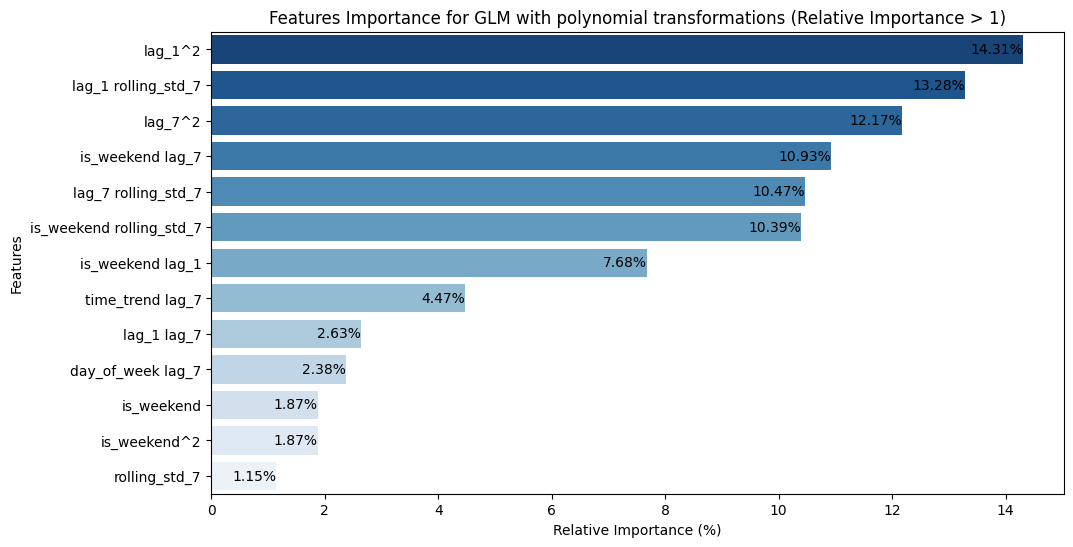

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar para mostrar apenas as features com importância relativa maior que 1
filtered_coef_df = coef_df[coef_df['relative_importance'] > 1]

# Ordenar por importância relativa
filtered_coef_df = filtered_coef_df.sort_values(by='relative_importance', ascending=True).reset_index(drop=True)

# Criar o gráfico de barras com cores que vão de azul escuro a claro
plt.figure(figsize=(11, 6))
sns.barplot(x=filtered_coef_df['relative_importance'], y=filtered_coef_df['features'], palette="Blues")

plt.xlabel('Relative Importance (%)')
plt.ylabel('Features')
plt.title('Features Importance for GLM with polynomial transformations (Relative Importance > 1)')

# Adicionar os valores às barras em preto para melhor visibilidade
for index, value in enumerate(filtered_coef_df['relative_importance']):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='right', color='black')

plt.gca().invert_yaxis()  # Garantir que a maior importância fique no topo
plt.show()



In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate on the training set
y_train_pred_glm = pipeline.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred_glm)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred_glm)
r2_train = r2_score(y_train, y_train_pred_glm)

print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training MAE: {mae_train}')
print(f'Training R²: {r2_train}')

# Evaluate on the test set
y_test_pred_glm = pipeline.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_glm)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred_glm)
r2_test = r2_score(y_test, y_test_pred_glm)

print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test MAE: {mae_test}')
print(f'Test R²: {r2_test}')

# Compare performance
if r2_test < r2_train:
    print("Potential overfitting detected: The model performs significantly better on the training data.")
else:
    print("No significant overfitting detected.")





Training MSE: 279.21110916293867
Training RMSE: 16.709611281024422
Training MAE: 7.763853007632508
Training R²: 0.7157932141700795
Test MSE: 246.19914714439378
Test RMSE: 15.690734436105716
Test MAE: 8.922022466229912
Test R²: 0.9599847164193378
No significant overfitting detected.


SVR MODEL

In [35]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

Kernel gaussiano

In [36]:
# Definir o modelo SVR com kernel RBF
model_svr = SVR(kernel='rbf', C=1.0, gamma='scale')

# Ajustar o modelo
model_svr.fit(X_train, y_train)

# "Summary" of the model
print(f"Support Vectors: {model_svr.support_vectors_}")
print(f"Number of Support Vectors: {model_svr.n_support_}")
print(f"Dual Coefficients: {model_svr.dual_coef_}")

# Fazer previsões no conjunto de teste
y_pred = model_svr.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

Support Vectors: [[3.         1.         5.         ... 0.         0.         0.        ]
 [3.         1.         5.         ... 0.         0.         0.15196078]
 [3.         1.         5.         ... 0.         0.15196078 0.22058824]
 ...
 [2.         1.         5.         ... 0.         0.19117647 0.4877451 ]
 [2.         1.         6.         ... 0.4877451  0.         0.4877451 ]
 [2.         0.         3.         ... 0.         0.         0.4877451 ]]
Number of Support Vectors: [175]
Dual Coefficients: [[-1.          1.          1.         -1.          1.          1.
  -1.          1.         -0.47165901 -1.         -1.         -1.
  -1.          1.         -1.          1.         -1.         -1.
   1.          1.          1.          1.          1.         -0.6374001
  -1.         -1.         -1.         -1.          1.         -1.
   1.          1.          1.          1.         -1.         -0.47573928
   1.         -1.         -1.          1.          1.         -1.
  -1.     

In [37]:
print("Modelo: SVR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: SVR split
# NORM SPLIT
# MAE: 27.376543697622704
# MSE: 6884.623095395144
# RMSE: 82.97362891542797
# R2: -0.11897278566379565
# ME: 27.18316069945638
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

# Modelo: SVR NORM SHUFF
# MAE: 18.76752125157459
# MSE: 4174.897819651288
# RMSE: 64.61344921648501
# R2: -0.08940030219864448
# ME: 18.581800483340743
# MAV: 18.692307692307693
# MPV: inf
# RME: -inf
# RMAE: inf



Modelo: SVR
MAE: 27.376543697622704
MSE: 6884.623095395144
RMSE: 82.97362891542797
R2: -0.11897278566379565
ME: 27.18316069945638
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


Linear Kernel

In [38]:
# Definir o modelo SVR com kernel RBF
model_svr_linear = SVR(kernel='linear', C=1.0)

# Ajustar o modelo
model_svr_linear.fit(X_train, y_train)

# "Summary" of the model
print(f"Support Vectors: {model_svr_linear.support_vectors_}")
print(f"Number of Support Vectors: {model_svr_linear.n_support_}")
print(f"Dual Coefficients: {model_svr_linear.dual_coef_}")

# Fazer previsões no conjunto de teste
y_pred = model_svr_linear.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

Support Vectors: [[3.         1.         5.         ... 0.         0.         0.        ]
 [3.         1.         6.         ... 0.         0.         0.        ]
 [3.         1.         5.         ... 0.         0.         0.15196078]
 ...
 [2.         0.         1.         ... 0.         0.         0.4877451 ]
 [2.         0.         2.         ... 0.         0.         0.4877451 ]
 [2.         0.         3.         ... 0.         0.         0.4877451 ]]
Number of Support Vectors: [206]
Dual Coefficients: [[-1.00000000e+00 -9.50918282e-01  1.00000000e+00  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -7.07728102e-01
   1.00000000e+00 -1.00000000e+00 -1.00000000e+00  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -2.98942008e-01  1.00000000e+00
  -1.00000000e+00 -7.36741964e-01 -1.00000000e+00 -4.39109093e-02
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00 -1.0000

c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [39]:
print("Modelo: SVR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

#NORM SPLIT
# MAE: 27.356738693281606
# MSE: 6862.492220336565
# RMSE: 82.84016067304894
# R2: -0.11537580634185729
# ME: 27.133258657169275
# MAV: 27.310344827586206
# MPV: inf
# RME: nan
# RMAE: inf

# NORM SHUFF
# MAE: 18.811740280726628
# MSE: 4161.808816598531
# RMSE: 64.51208271787954
# R2: -0.08598485001343548
# ME: 18.528199340170854
# MAV: 18.692307692307693
# MPV: inf
# RME: nan
# RMAE: inf




Modelo: SVR
MAE: 27.356738693281606
MSE: 6862.492220336565
RMSE: 82.84016067304894
R2: -0.11537580634185729
ME: 27.133258657169275
MAV: 27.310344827586206
MPV: inf
RME: nan
RMAE: inf


# MLP NN MODEL

In [40]:
from sklearn.neural_network import MLPRegressor

In [41]:
# Definir o modelo MLP com uma camada oculta de 100 neurônios (você pode ajustar os parâmetros conforme necessário)
model_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Ajustar o modelo aos dados de treino
model_mlp.fit(X_train, y_train)

# "Summary" do modelo
print(f"Coefs: {model_mlp.coefs_}")
print(f"Intercepts: {model_mlp.intercepts_}")
print(f"Número de iterações: {model_mlp.n_iter_}")

# Fazer previsões no conjunto de teste
y_pred = model_mlp.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

Coefs: [array([[-7.74579694e-02, -1.78677649e-02,  2.54721750e-01,
         1.11688002e-01, -6.72350349e-02,  3.58948264e-02,
        -2.39038826e-01,  1.34642534e-01,  2.29260371e-01,
         3.00515103e-01, -2.02506382e-01,  2.25557281e-01,
         2.21617246e-01,  1.28738169e-01, -6.81107376e-02,
        -9.18260857e-04, -8.18954017e-02,  7.27850721e-02,
         3.52734776e-02, -4.16773977e-02,  1.11909925e-01,
        -2.44845801e-01, -3.07513233e-77, -8.84514824e-84,
         2.10737157e-01,  1.87918361e-01, -4.66417917e-02,
         8.28787549e-02,  1.05804069e-01,  7.53700608e-54,
        -5.64076820e-02, -5.98244233e-02,  6.90619537e-56,
         2.90517063e-01,  2.56861453e-01,  1.28605836e-01,
         1.78305971e-01, -1.97428456e-01,  7.63966406e-02,
         7.93920932e-02, -2.97760248e-02,  6.56141745e-02,
        -2.22963051e-01,  2.51763509e-01,  7.49719808e-75,
         1.55381444e-02, -9.68778497e-02,  6.70148417e-02,
         8.09893126e-02, -1.94544955e-01,  2.889

c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [42]:
print("Modelo: MPL NN")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: MPL NN NORM SHUFF
# MAE: 29.135634756182217
# MSE: 2468.8454791712534
# RMSE: 49.687478092284515
# R2: 0.35577800289359685
# ME: -1.8889649873228302
# MAV: 18.692307692307693
# MPV: inf
# RME: nan
# RMAE: inf

# NORM SPLIT
# MAE: 23.231571018935746
# MSE: 1806.6100488185823
# RMSE: 42.50423565738575
# R2: 0.7063677341629828
# ME: 0.6748824240572905
# MAV: 27.310344827586206
# MPV: inf
# RME: nan
# RMAE: inf

Modelo: MPL NN
MAE: 23.231571018935746
MSE: 1806.6100488185823
RMSE: 42.50423565738575
R2: 0.7063677341629828
ME: 0.6748824240572905
MAV: 27.310344827586206
MPV: inf
RME: nan
RMAE: inf


# LSTM

In [39]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

In [40]:
# Certifique-se de que seus dados estejam no formato adequado para o LSTM
# LSTM espera os dados na forma de [samples, time_steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Definir o modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1))  # Camada de saída

# Compilar o modelo
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Ajustar o modelo aos dados de treino
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# "Summary" do modelo
model_lstm.summary()

# Fazer previsões no conjunto de teste
y_pred = model_lstm.predict(X_test)

print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# Flatten y_pred to make it a 1D array
y_pred = y_pred.flatten()

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 841.5786
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 770.7662
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 659.9703
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 821.1042
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 903.2792
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 714.3047
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 746.0290
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 759.9023
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 778.1140
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 777.4099
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 645.0474
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 860.3237 
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 646.7651
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 730.7183
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Shape of y_test: (156,)
Shape of y_pred: (156, 1)


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [45]:
print("Modelo: LSTM")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# NORM SHUFFLE
# MAE: 22.169618715651524
# MSE: 3707.086817984774
# RMSE: 60.885850720711574
# R2: 0.03267049789428711
# ME: 12.096771832651052
# MAV: 18.692307692307693
# MPV: inf
# RME: nan
# RMAE: inf

#NORM SPLIT
# MAE: 33.13001951678046
# MSE: 5671.544976005317
# RMSE: 75.3096605755551
# R2: 0.07819151878356934
# ME: 14.990236907169736
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

Modelo: LSTM
MAE: 33.13001951678046
MSE: 5671.544976005317
RMSE: 75.3096605755551
R2: 0.07819151878356934
ME: 14.990236907169736
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


# XGB MODEL

In [60]:
from xgboost import XGBRegressor

In [61]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (722, 8)
y_train shape: (722,)


In [ ]:
# Reshape X_train to (722, 8)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])

# Similarly reshape X_test if it has the same issue
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [62]:
# Initialize the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
xgb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)
me = np.mean(y_test - y_pred_xgb)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred_xgb) / y_test))
rme = np.mean((y_test - y_pred_xgb) / y_test)
rmae = np.mean(np.abs(y_test - y_pred_xgb) / np.abs(y_test))

c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [63]:
print("Modelo: XGB")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# # Modelo: XGB split
# MAE: 8.599641244601587
# MSE: 1091.1671967076672
# RMSE: 33.03281999326832
# R2: 0.8226501941680908
# ME: 6.393314923577267
# MAV: 27.310344827586206
# MPV: inf
# RME: nan
# RMAE: inf

# # Modelo: XGB shuffle
# MAE: 15.794678707983202
# MSE: 1433.86200901028
# RMSE: 37.86637042297928
# R2: 0.6258471608161926
# ME: 3.3704118224589203
# MAV: 18.692307692307693
# MPV: inf
# RME: nan
# RMAE: inf

Modelo: XGB
MAE: 8.599641244601587
MSE: 1091.1671967076672
RMSE: 33.03281999326832
R2: 0.8226501941680908
ME: 6.393314923577267
MAV: 27.310344827586206
MPV: inf
RME: nan
RMAE: inf


         Feature  Importance
6          lag_7   24.903418
7  rolling_std_7   22.005957
4         season   20.021366
2    day_of_week   13.757250
5          lag_1    6.369178
1     is_weekend    6.315908
3     time_trend    3.777102
0          month    2.849822


C:\Users\Patyc\AppData\Local\Temp\ipykernel_57164\3504292392.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Blues_r")


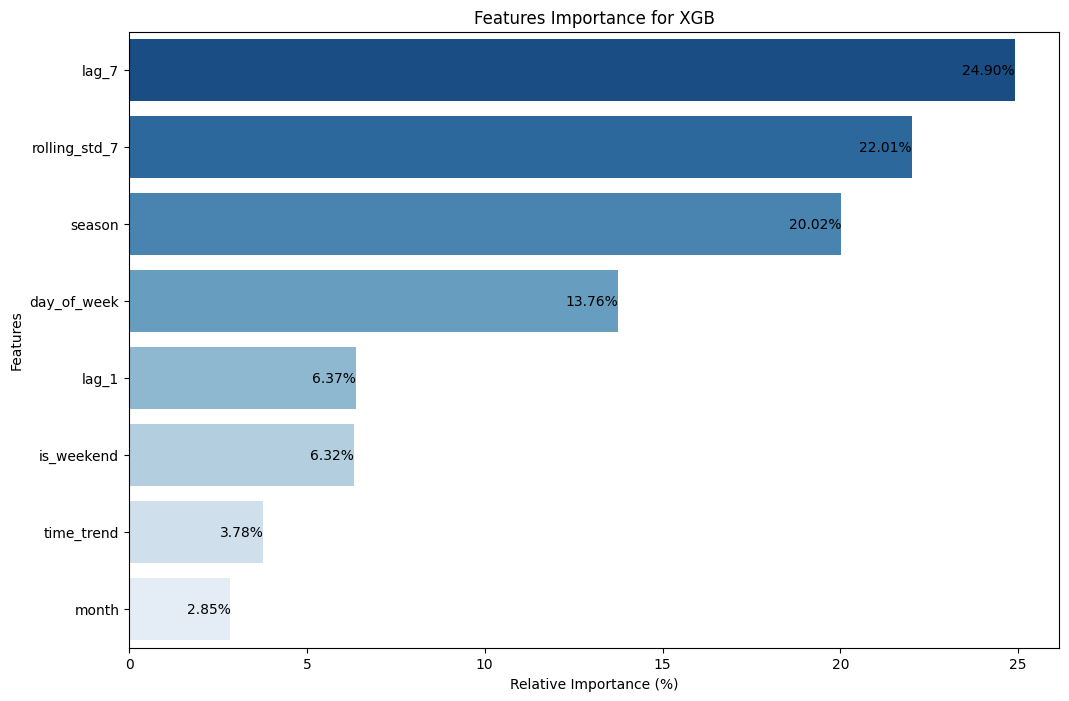

In [64]:
# Extract feature importances
importances = xgb_model.feature_importances_ * 100  # Convert to percentage
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Plotting the feature importances as percentages
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="Blues_r")

plt.xlabel('Relative Importance (%)')
plt.ylabel('Features')
plt.title('Features Importance for XGB')

# Add values to bars for clarity, using black color for better visibility
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='right', color='black')

plt.show()


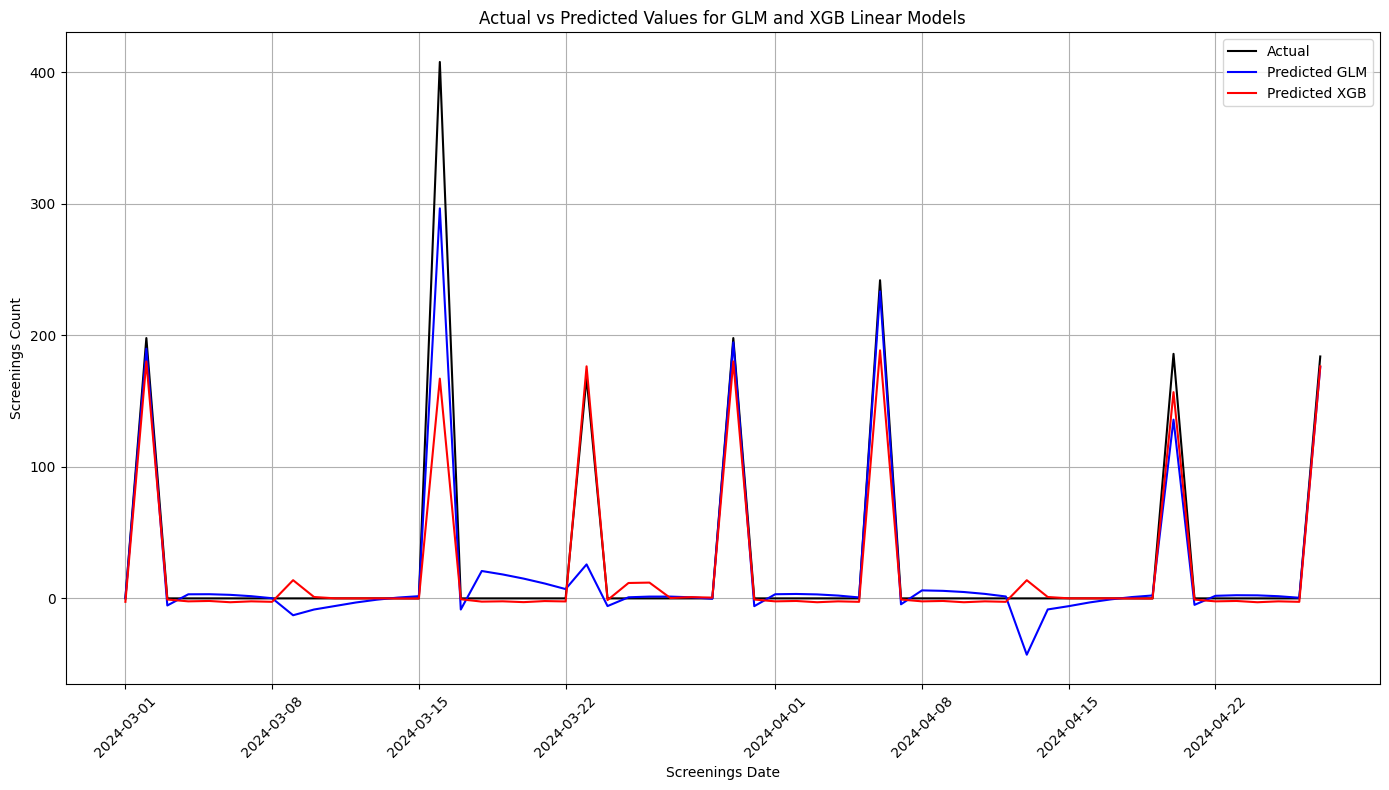

In [66]:
import matplotlib.pyplot as plt

# Creating a DataFrame to hold the actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_GLM': y_pred_glm,
    'Predicted_XGB': y_pred_xgb
})

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(X_test.index, results_df['Actual'], label='Actual', color='black')
plt.plot(X_test.index, results_df['Predicted_GLM'], label='Predicted GLM', color='blue')
plt.plot(X_test.index, results_df['Predicted_XGB'], label='Predicted XGB', color='red')

plt.title('Actual vs Predicted Values for GLM and XGB Linear Models')
plt.xlabel('Screenings Date')
plt.ylabel('Screenings Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# HYBRID GLM + XGB

In [67]:
# Make predictions with both models
y_pred_glm = model_glm.predict(X_test_poly)
y_pred_xgb = xgb_model.predict(X_test)

# Create a hybrid prediction by averaging the predictions from both models
y_pred_hybrid = (y_pred_glm + y_pred_xgb) / 2

# Calculate and print the evaluation metrics for the hybrid model
mae = mean_absolute_error(y_test, y_pred_hybrid)
mse = mean_squared_error(y_test, y_pred_hybrid)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_hybrid)
me = np.mean(y_test - y_pred_hybrid)
mav = np.mean(np.abs(y_pred_hybrid))
mpv = np.mean(np.abs((y_test - y_pred_hybrid) / y_test))
rme = np.mean((y_test - y_pred_hybrid) / y_test)
rmae = np.mean(np.abs(y_test - y_pred_hybrid) / np.abs(y_test))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"ME: {me}")
print(f"MAV: {mav}")
print(f"MPV: {mpv}")
print(f"RME: {rme}")
print(f"RMAE: {rmae}")


MAE: 7.908316084820846
MSE: 672.1051373177132
RMSE: 25.924990594361134
R2: 0.890761288258993
ME: 5.980876180173664
MAV: 23.33567918478496
MPV: inf
RME: nan
RMAE: inf


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [71]:
# Assign weights to each model's predictions
weight_glm = 0.6
weight_xgb = 0.4

# Create a hybrid prediction by weighted averaging
y_pred_hybrid = (weight_glm * y_pred_glm) + (weight_xgb * y_pred_xgb)

# Calculate and print the evaluation metrics for the hybrid model
mae = mean_absolute_error(y_test, y_pred_hybrid)
mse = mean_squared_error(y_test, y_pred_hybrid)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_hybrid)
me = np.mean(y_test - y_pred_hybrid)
mav = np.mean(np.abs(y_pred_hybrid))
mpv = np.mean(np.abs((y_test - y_pred_hybrid) / y_test))
rme = np.mean((y_test - y_pred_hybrid) / y_test)
rmae = np.mean(np.abs(y_test - y_pred_hybrid) / np.abs(y_test))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"ME: {me}")
print(f"MAV: {mav}")
print(f"MPV: {mpv}")
print(f"RME: {rme}")
print(f"RMAE: {rmae}")


MAE: 8.308147100819914
MSE: 638.9186595305466
RMSE: 25.276840378705298
R2: 0.8961551587703234
ME: 5.898388494334736
MAV: 23.82649553187431
MPV: inf
RME: nan
RMAE: inf


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [72]:
from sklearn.linear_model import LinearRegression

# Create predictions from the base models
y_pred_glm = model_glm.predict(X_test_poly)
y_pred_xgb = xgb_model.predict(X_test)

# Combine the predictions into a new feature set
X_stack = np.column_stack((y_pred_glm, y_pred_xgb))

# Train a meta-learner (e.g., linear regression) on the combined predictions
stacking_model = LinearRegression()
stacking_model.fit(X_stack, y_test)

# Make predictions with the stacking model
y_pred_hybrid = stacking_model.predict(X_stack)

# Calculate and print the evaluation metrics for the hybrid model
mae = mean_absolute_error(y_test, y_pred_hybrid)
mse = mean_squared_error(y_test, y_pred_hybrid)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_hybrid)
me = np.mean(y_test - y_pred_hybrid)
mav = np.mean(np.abs(y_pred_hybrid))
mpv = np.mean(np.abs((y_test - y_pred_hybrid) / y_test))
rme = np.mean((y_test - y_pred_hybrid) / y_test)
rmae = np.mean(np.abs(y_test - y_pred_hybrid) / np.abs(y_test))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"ME: {me}")
print(f"MAV: {mav}")
print(f"MPV: {mpv}")
print(f"RME: {rme}")
print(f"RMAE: {rmae}")


MAE: 8.227374469984042
MSE: 349.4246998561745
RMSE: 18.692905067329008
R2: 0.9432072425229318
ME: 8.575515776415003e-16
MAV: 30.11792106841436
MPV: inf
RME: nan
RMAE: inf


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [75]:
import pandas as pd

# Data for the table
data = {
    'Technique': ['Simple Averaging', 'Weighted Averaging', 'Stacking'],
    'GLM_MAE': [7.908316084820846, 8.308147100819914, 8.227374469984042],
    'GLM_RMSE': [25.924990594361134, 25.276840378705298, 18.692905067329008],
    'GLM_R2': [0.890761288258993, 0.8961551587703234, 0.9432072425229318],
    'XGB_MAE': [7.908316084820846, 8.308147100819914, 8.227374469984042],
    'XGB_RMSE': [25.924990594361134, 25.276840378705298, 18.692905067329008],
    'XGB_R2': [0.890761288258993, 0.8961551587703234, 0.9432072425229318]
}

# Creating the DataFrame
results_df = pd.DataFrame(data)

# Setting the 'Technique' column as the index
results_df.set_index('Technique', inplace=True)

# Exporting the DataFrame to an Excel file
results_df.to_excel('model_comparison.xlsx')

# Displaying the DataFrame
print(results_df)



                     GLM_MAE   GLM_RMSE    GLM_R2   XGB_MAE   XGB_RMSE  \
Technique                                                                
Simple Averaging    7.908316  25.924991  0.890761  7.908316  25.924991   
Weighted Averaging  8.308147  25.276840  0.896155  8.308147  25.276840   
Stacking            8.227374  18.692905  0.943207  8.227374  18.692905   

                      XGB_R2  
Technique                     
Simple Averaging    0.890761  
Weighted Averaging  0.896155  
Stacking            0.943207  


sem outliers

In [84]:
# Ensure that the index is in datetime format
df.index = pd.to_datetime(df.index)

# Define the split date
split_date = '2024-03-01'

# Split the data into train and test sets based on the split date
train_df = df[df.index < split_date]
test_df = df[df.index >= split_date]

# Separate the features (X) and the target (y) for training and testing sets
X_train = train_df.drop(columns=['Total_screenings'])
y_train = train_df['Total_screenings']

X_test = test_df.drop(columns=['Total_screenings'])
y_test = test_df['Total_screenings']

In [80]:
# Split the data into train and test sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, shuffle=False)

In [86]:
from scipy.stats import zscore

# Calculate the Z-scores of the 'Total_screenings' variable in the training set
z_scores_train = np.abs(zscore(y_train))

# Define a threshold for identifying outliers
threshold = 3

# Filter out the outliers in the training data
train_no_outliers_df = train_df[z_scores_train < threshold]

# Separate the features (X) and the target (y) after removing outliers
X_train_no_outliers = train_no_outliers_df.drop(columns=['Total_screenings'])
y_train_no_outliers = train_no_outliers_df['Total_screenings']


In [93]:
# Initialize the XGBoost regressor
xgb_model_no_outliers = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model without outliers
xgb_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test set
y_pred_no_outliers = xgb_model_no_outliers.predict(X_test_no_outliers)

# Calculate and print the evaluation metrics
mae_no_outliers = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
rmse_no_outliers = np.sqrt(mse_no_outliers)
r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)
me_no_outliers = np.mean(y_test_no_outliers - y_pred_no_outliers)
mav_no_outliers = np.mean(np.abs(y_test_no_outliers))
mpv_no_outliers = np.mean(np.abs((y_test_no_outliers - y_pred_no_outliers) / y_test_no_outliers))
rme_no_outliers = np.mean((y_test_no_outliers - y_pred_no_outliers) / y_test_no_outliers)
rmae_no_outliers = np.mean(np.abs(y_test_no_outliers - y_pred_no_outliers) / np.abs(y_test_no_outliers))

print("Modelo: XGB (No Outliers)")
print(f'MAE: {mae_no_outliers}')
print(f'MSE: {mse_no_outliers}')
print(f'RMSE: {rmse_no_outliers}')
print(f'R2: {r2_no_outliers}')
print(f'ME: {me_no_outliers}')
print(f'MAV: {mav_no_outliers}')
print(f'MPV: {mpv_no_outliers}')
print(f'RME: {rme_no_outliers}')
print(f'RMAE: {rmae_no_outliers}')


Modelo: XGB (No Outliers)
MAE: 0.2571792920664854
MSE: 0.3367186820503339
RMSE: 0.5802746608721889
R2: 0.9975774884223938
ME: -0.058121228662130785
MAV: 1.8431372549019607
MPV: inf
RME: nan
RMAE: inf


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


ValueError: x and y must have same first dimension, but have shapes (58,) and (153,)

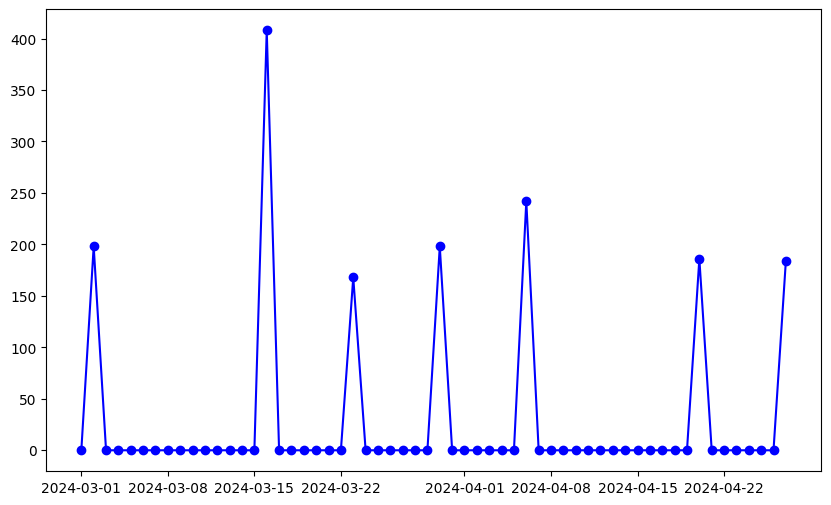

In [94]:
import matplotlib.pyplot as plt

# Plot y_test vs y_pred_no_outliers
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Real Values', color='blue', marker='o', linestyle='-')
plt.plot(y_test.index, y_pred_no_outliers, label='Predicted Values (No Outliers)', color='orange', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Screenings')
plt.title('Real vs Predicted Values Over Time (No Outliers)')
plt.legend()
plt.grid(True)
plt.show()

